# Inteligência Artificial para classificação de imagens


## Estruturando o ambiente
### Criação de Pastas e subpastas para o armazenamento das imagens
### Baixando e consumindo as imagens dos satélites

In [8]:
!mkdir img
%cd img

/content/img


### Baixando as imagens do Satélite (Sentinel 1)
#### Data: 19/06/2018


In [10]:
!mkdir sentinel1_assets
%cd /content/img/sentinel1_assets
!wget http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel1/20180619_S1A/clip_20180619T083553_Sigma0_VH_db.tif
!wget http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel1/20180619_S1A/clip_20180619T083553_Sigma0_VV_db.tif

/content/img/sentinel1_assets
--2020-06-14 20:00:33--  http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel1/20180619_S1A/clip_20180619T083553_Sigma0_VH_db.tif
Resolving www.dpi.inpe.br (www.dpi.inpe.br)... 150.163.2.5
Connecting to www.dpi.inpe.br (www.dpi.inpe.br)|150.163.2.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 226261291 (216M) [image/tiff]
Saving to: ‘clip_20180619T083553_Sigma0_VH_db.tif’

clip_20180619T08355 100%[===================>] 215.78M  1.87MB/s    in 2m 43s  

2020-06-14 20:03:17 (1.32 MB/s) - ‘clip_20180619T083553_Sigma0_VH_db.tif’ saved [226261291/226261291]

--2020-06-14 20:03:19--  http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel1/20180619_S1A/clip_20180619T083553_Sigma0_VV_db.tif
Resolving www.dpi.inpe.br (www.dpi.inpe.br)... 150.163.2.5
Connecting to www.dpi.inpe.br (www.dpi.inpe.br)|150.163.2.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229570972 (219M) [

### Baixando as imagens do Satélite (Sentinel 2)
#### Data: 29/06/2018

In [11]:
!mkdir /content/img/sentinel2_assets
%cd /content/img/sentinel2_assets
!wget http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel2/Sentinel-2A_Images/S2A_MSIL2A_20180629.zip

/content/img/sentinel2_assets
--2020-06-14 20:05:59--  http://www.dpi.inpe.br/obt/agricultural-database/lem/dados/cenas/Sentinel2/Sentinel-2A_Images/S2A_MSIL2A_20180629.zip
Resolving www.dpi.inpe.br (www.dpi.inpe.br)... 150.163.2.5
Connecting to www.dpi.inpe.br (www.dpi.inpe.br)|150.163.2.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2369681109 (2.2G) [application/zip]
Saving to: ‘S2A_MSIL2A_20180629.zip’

S2A_MSIL2A_20180629 100%[===================>]   2.21G  2.25MB/s    in 27m 45s 

2020-06-14 20:33:45 (1.36 MB/s) - ‘S2A_MSIL2A_20180629.zip’ saved [2369681109/2369681109]



### Descompactando a pasta referente às imagens do satélite (Sentinel 2)

In [14]:
!unzip ./S2A_MSIL2A_20180629.zip

Archive:  ./S2A_MSIL2A_20180629.zip
   creating: S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/
   creating: S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/AUX_DATA/
   creating: S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/DATASTRIP/
   creating: S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/DATASTRIP/DS_SGS__20180629T164308_S20180629T132233/
  inflating: S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/DATASTRIP/DS_SGS__20180629T164308_S20180629T132233/MTD_DS.xml  
   creating: S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/DATASTRIP/DS_SGS__20180629T164308_S20180629T132233/QI_DATA/
  inflating: S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/DATASTRIP/DS_SGS__20180629T164308_S20180629T132233/QI_DATA/FORMAT_CORRECTNESS.xml  
  inflating: S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/DATASTRIP/DS_SGS__20180629T164308_S20180629T132233

## Tratamento das imagens captadas

### Baixando Shape Files a partir do arquivo ZIP dentro da plataforma GOOGLE DRIVE

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
!unzip /content/drive/"My Drive"/FATEC/LEMS.zip -d /content/

Archive:  /content/drive/My Drive/FATEC/LEMS.zip
   creating: /content/LEMS/
  inflating: /content/LEMS/LEM.dbf   
  inflating: /content/LEMS/LEM.shp   
  inflating: /content/LEMS/LEM.shx   
  inflating: /content/LEMS/shape.dbf  
  inflating: /content/LEMS/shape.shp  
  inflating: /content/LEMS/shape.shx  


### Listando todos os shapes armazenados

In [15]:
!ls /content/LEMS/

LEM.dbf  LEM.shp  LEM.shx  shape.dbf  shape.shp  shape.shx


### Preparando ambiente de Desenvolvimento : Baixando as bibliotecas para tratamento das imagens baixadas

#### Baixando Bibliotecas : Geopandas, rasterio e EOBOX

In [16]:
pip install geopandas rasterio eobox

### Plotando imagens baixadas
#### Adicionando bibliotecas

In [0]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [0]:
from eobox.raster import extraction

### Shapes previamente selecionados pelos grupos

In [0]:
shp1_dir = "/content/LEMS/LEM.shp"
shp2_dir = "/content/LEMS/shape.shp"
shp1_file = gpd.read_file(shp1_dir)
shp2_file = gpd.read_file(shp2_dir)

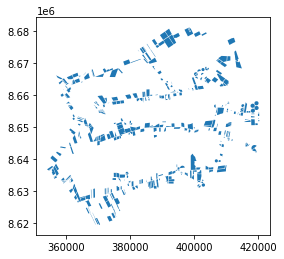

In [20]:
shp1_file.plot()

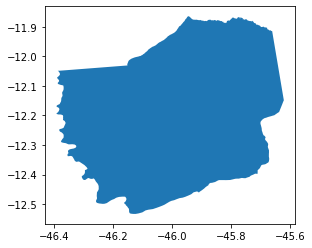

In [21]:
shp2_file.plot()

### Listando conteúdo do diretório referente ao Sentinel 2
#### Plotando imagem baixada
#### Data da Imagem : 29/06/2018

In [22]:
!ls /content/img/sentinel2_assets/

S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE
S2A_MSIL2A_20180629T132231_N0206_R038_T23LMG_20180629T164308.SAFE
S2A_MSIL2A_20180629.zip


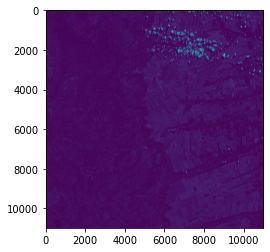

In [23]:
s2_img1 = "/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/GRANULE/L2A_T23LLG_A015765_20180629T132233/IMG_DATA/R10m/T23LLG_20180629T132231_B02_10m.jp2"
raster = rasterio.open(s2_img1)
plt.imshow(raster.read(1))

### Percorre as imagens do Sentinel 2

#### Adicionando bibliotecas necessárias e Gerando TIF

In [0]:
import fnmatch
import os
from pathlib import Path
from shapely.geometry import Point

In [25]:
dir_ = "/content/img/sentinel2_assets/"

sub_folders = []
for path, subdirs, files in os.walk(dir_):
    for file in files:
        sub_folders.append(os.path.join(path, file))

sub_folders

['/content/img/sentinel2_assets/S2A_MSIL2A_20180629.zip',
 '/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/INSPIRE.xml',
 '/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/MTD_MSIL2A.xml',
 '/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/manifest.safe',
 '/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/DATASTRIP/DS_SGS__20180629T164308_S20180629T132233/MTD_DS.xml',
 '/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/DATASTRIP/DS_SGS__20180629T164308_S20180629T132233/QI_DATA/GEOMETRIC_QUALITY.xml',
 '/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/DATASTRIP/DS_SGS__20180629T164308_S20180629T132233/QI_DATA/SENSOR_QUALITY.xml',
 '/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_201

In [27]:
%time
s2_img2 = "/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/GRANULE/L2A_T23LLG_A015765_20180629T132233/IMG_DATA/R10m/T23LLG_20180629T132231_B02_10m.jp2"
s2_img3 = "/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/GRANULE/L2A_T23LLG_A015765_20180629T132233/IMG_DATA/R10m/T23LLG_20180629T132231_B03_10m.jp2"
s2_img4 = "/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/GRANULE/L2A_T23LLG_A015765_20180629T132233/IMG_DATA/R10m/T23LLG_20180629T132231_B04_10m.jp2"
s2_img5 = "/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/GRANULE/L2A_T23LLG_A015765_20180629T132233/IMG_DATA/R10m/T23LLG_20180629T132231_B08_10m.jp2"
s2_img6 = "/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/GRANULE/L2A_T23LLG_A015765_20180629T132233/IMG_DATA/R10m/T23LLG_20180629T132231_TCI_10m.jp2"
s2_img7 = "/content/img/sentinel2_assets/S2A_MSIL2A_20180629T132231_N0206_R038_T23LLG_20180629T164308.SAFE/GRANULE/L2A_T23LLG_A015765_20180629T132233/IMG_DATA/R10m/T23LLG_20180629T132231_WVP_10m.jp2"
extraction.extract(src_vector= shp1_dir,
                   burn_attribute= "ID",
                   src_raster= [s2_img2,s2_img3,s2_img4,s2_img5,s2_img6,s2_img7],
                   dst_names= ["img2", "img3", "img4", "img5", "img6", "img7"],
                   dst_dir= "/content/dataset",
                   n_jobs= -1)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.53 µs


0

### Plotando TIF gerado

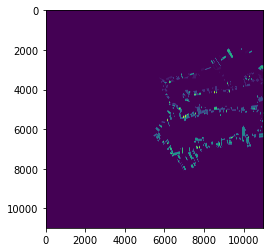

In [28]:
result_tif = "/content/dataset/burn_attribute_rasterized_ID.tif"
result = rasterio.open(result_tif)
plt.imshow(result.read(1))

In [29]:
extractedFile = extraction.load_extracted("/content/dataset", patterns=["aux_*.npy", "im*??.npy"])
geometry = [Point(xy) for xy in zip(extractedFile.aux_coord_x, extractedFile.aux_coord_y)]
gdf_gen = gpd.GeoDataFrame(
    extractedFile,
    crs = {'init': 'epsg:32723'},
    geometry = geometry
)
gdf_gen.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,aux_coord_x,aux_coord_y,aux_vector_ID,img2,img3,img4,img5,img7,geometry
0,398495.0,8681115.0,6,823,1098,1475,2277,1125,POINT (398495.000 8681115.000)
1,398485.0,8681105.0,6,789,1073,1443,2283,1148,POINT (398485.000 8681105.000)
2,398495.0,8681105.0,6,835,1105,1491,2287,1142,POINT (398495.000 8681105.000)
3,398465.0,8681095.0,6,790,1084,1468,2291,1148,POINT (398465.000 8681095.000)
4,398475.0,8681095.0,6,799,1047,1467,2284,1149,POINT (398475.000 8681095.000)


### Analisando variável gerada com as análises das imagens

In [30]:
# Variável criada para armazenar os dados analisados a partir das imagens do Satélite
gdf_gen

,aux_coord_x,aux_coord_y,aux_vector_ID,img2,img3,img4,img5,img7,geometry
0,398495.0,8681115.0,6,823,1098,1475,2277,1125,POINT (398495.000 8681115.000)
1,398485.0,8681105.0,6,789,1073,1443,2283,1148,POINT (398485.000 8681105.000)
2,398495.0,8681105.0,6,835,1105,1491,2287,1142,POINT (398495.000 8681105.000)
3,398465.0,8681095.0,6,790,1084,1468,2291,1148,POINT (398465.000 8681095.000)
4,398475.0,8681095.0,6,799,1047,1467,2284,1149,POINT (398475.000 8681095.000)
...,...,...,...,...,...,...,...,...,...
2645240,370345.0,8619385.0,563,1399,1793,2231,3610,878,POINT (370345.000 8619385.000)
2645241,370355.0,8619385.0,563,1370,1714,2179,3601,868,POINT (370355.000 8619385.000)
2645242,370365.0,8619385.0,563,1374,1685,2116,3571,868,POINT (370365.000 8619385.000)
2645243,370375.0,8619385.0,563,1380,1702,2067,3548,870,POINT (370375.000 8619385.000)


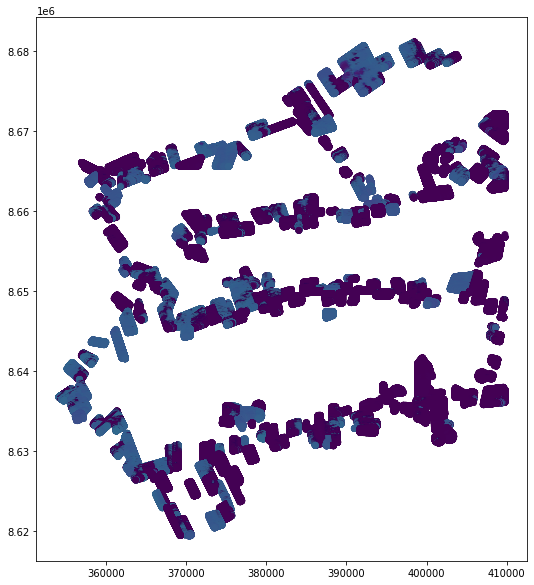

In [31]:
gdf_gen["ndvi"] = (gdf_gen["img7"] - gdf_gen["img3"])/(gdf_gen["img7"] + gdf_gen["img3"])
gdf_gen.plot(column="ndvi",figsize=(10,10))

## Adicionando Inteligência Artificial
### Tensorflow e Keras

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


#### Extraindo metadados gerados com as análises anteriores

In [34]:
!unzip /content/drive/"My Drive"/FATEC/dataset_in.zip -d /content/dataset/

Archive:  /content/drive/My Drive/FATEC/dataset_in.zip
  inflating: /content/dataset/dataset_in.csv  


In [37]:
meta_dados = pd.read_csv("/content/dataset/dataset_in.csv")
meta_dados.head()

,Unnamed: 0,x,y,in_b02,in_b03,in_b04,in_b08,result,in_ndvi
0,0,0,0,150,374,208,3032,0,0.871605
1,1,0,1,174,405,242,2821,0,0.841985
2,2,0,2,171,367,242,2348,0,0.813127
3,3,0,3,183,404,279,2203,0,0.775181
4,4,0,4,332,604,625,2332,0,0.577274


In [38]:
ndvi_temp = meta_dados['in_ndvi']
meta_dados = meta_dados/meta_dados.max()
meta_dados['in_ndvi'] = ndvi_temp
meta_dados = meta_dados.drop(["Unnamed: 0","x","y"],axis=1)
meta_dados.loc[meta_dados["result"] > 0, 'result'] = 1
meta_dados

,in_b02,in_b03,in_b04,in_b08,result,in_ndvi
0,0.018701,0.049159,0.029222,0.428249,0.0,0.871605
1,0.021693,0.053233,0.033998,0.398446,0.0,0.841985
2,0.021319,0.048239,0.033998,0.331638,0.0,0.813127
3,0.022815,0.053102,0.039196,0.311158,0.0,0.775181
4,0.041391,0.079390,0.087806,0.329379,0.0,0.577274
...,...,...,...,...,...,...
3348895,0.037651,0.084911,0.097921,0.373023,0.0,0.582385
3348896,0.032041,0.076104,0.082607,0.364124,0.0,0.628553
3348897,0.040020,0.086488,0.099607,0.363277,0.0,0.567815
3348898,0.040643,0.086619,0.097640,0.366384,0.0,0.577379


In [39]:
arr_out = []
result_column= meta_dados["result"]
for i in range(3348900):
  if(result_column[i] == 1):
    arr_out.append([0,1])
  else:
    arr_out.append([1,0])
np.array(arr_out)

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [40]:
result_img = []
for i in range(0,1830):
  col = []
  for j in range(0,1830):
    col.append(meta_dados['result'][j+i*1830])
  result_img.append(col)
result_img = np.array(result_img)
result_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

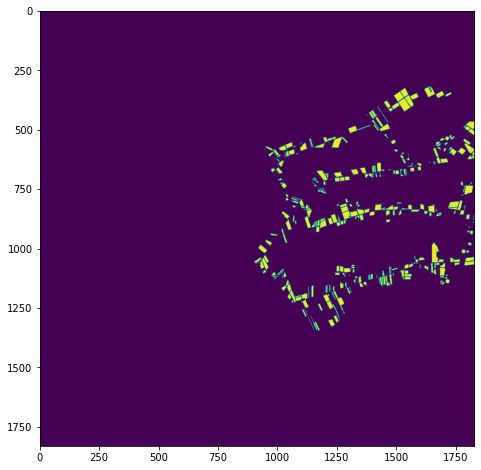

In [41]:
plt.figure(figsize = (8,8))
plt.imshow(result_img)

In [0]:
y = np.array(arr_out)
x = meta_dados.drop(columns="result",axis=0).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Criando variável que receberá os dados necessários para treinamento da IA

In [43]:
x_train

array([[0.02169306, 0.05218191, 0.04748525, 0.66101695, 0.86528497],
       [0.06146366, 0.09621451, 0.09314414, 0.35762712, 0.58497653],
       [0.44009475, 0.45872766, 0.45855577, 0.59265537, 0.12493298],
       ...,
       [0.08116195, 0.12868034, 0.19935375, 0.36384181, 0.28961202],
       [0.07692308, 0.13577813, 0.22562518, 0.32245763, 0.17408074],
       [0.04151602, 0.10725552, 0.09960663, 0.49661017, 0.6643787 ]])

In [44]:
y_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [0]:
model = Sequential()
input_shape = x_train[0].shape
model.add(Dense(5,activation='relu',input_shape=input_shape))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["acc"])

In [48]:
model.fit(x_train,y_train, epochs=100, batch_size=50000, shuffle=True)

Epoch 1/100
2344230/2344230 [==============================] - 3s 1us/step - loss: 0.6332 - acc: 0.5231
Epoch 2/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.5476 - acc: 0.9579
Epoch 3/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.4396 - acc: 0.9781
Epoch 4/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.3294 - acc: 0.9781
Epoch 5/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.2384 - acc: 0.9781
Epoch 6/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.1771 - acc: 0.9781
Epoch 7/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.1438 - acc: 0.9781
Epoch 8/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.1282 - acc: 0.9781
Epoch 9/100
2344230/2344230 [==============================] - 1s 1us/step - loss: 0.1206 - acc: 0.9781
Epoch 10/100
2344230/2344230 [==============================] - 

In [49]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nPorcentagem de Sucesso no reconhecimento:', test_acc)


Test accuracy: 0.977944016456604


In [50]:
preds = model.predict(x,batch_size=50000)
preds

array([[0.9891754 , 0.01010839],
       [0.9919996 , 0.0073326 ],
       [0.99563867, 0.00385048],
       ...,
       [0.98135936, 0.01800219],
       [0.98242724, 0.01690917],
       [0.9834874 , 0.01582799]], dtype=float32)

In [54]:
prev_img = []
def eps(n):
  return n > 0.042
for i in range(0,1830):
  prev_img.append([])
  for j in range(0,1830):
    prev_img[i].append(1 if eps(preds[j+i*1830][1]) else 0)
prev_img = np.array(prev_img)
prev_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

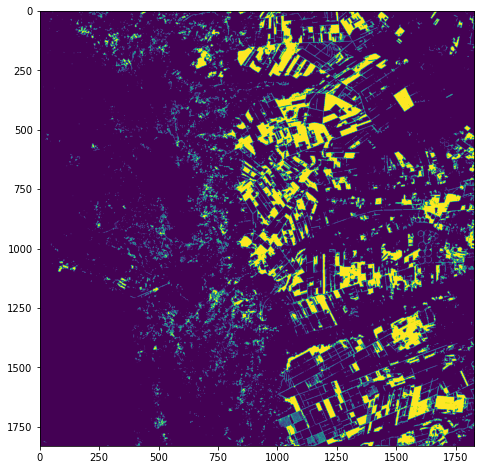

In [52]:
plt.figure(figsize = (8,8))
plt.imshow(img_pred)